## Introduction

The `plot_forest()` function from `ArviZ` helps visualize multiple posteriors. Currently this function displays two different types of plots,

 + *Forest plots*: display credible intervals.
 
 + *Ridge plots*: display marginal posterior densities.

This function is the ArviZ equivalent of `mcmc_intervals()` and `mcmc_areas_ridges()` functions from the [bayesplot](https://mc-stan.org/bayesplot/reference/MCMC-intervals.html) package. The functionality and defaults of the three functions are the same, providing visual summaries with pretty aesthetics for the parameters' credible intervals.

@fig-polar shows the current default forest and ridge plots, for $\theta$ in the eight schools example.

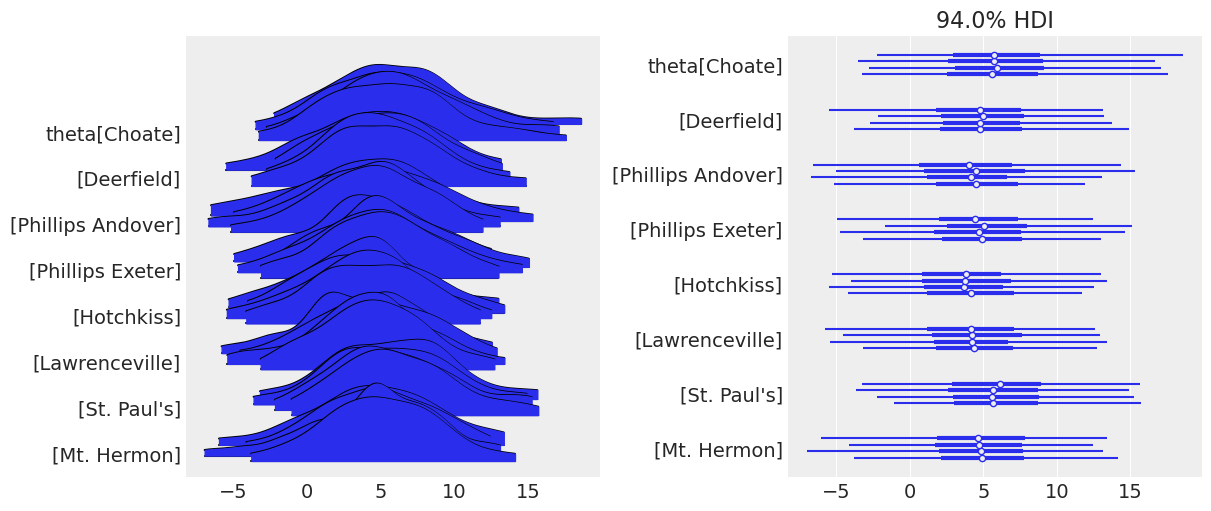

In [8]:
#| label: fig-polar
#| fig-cap: "Posterior estimates for theta, 8 schools example"

import matplotlib.pyplot as plt
import arviz as az

az.style.use("arviz-darkgrid")
non_centered_data = az.load_arviz_data('non_centered_eight')

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

az.plot_forest(non_centered_data,kind='ridgeplot',var_names=['theta'],ax=ax1)
az.plot_forest(non_centered_data,kind='forestplot',var_names=['theta'],ax=ax2)
plt.show()

## Analysis of current defaults

The forest and ridge plots display credible intervals and densities for every parameter's posterior separated by its chains. The visualization is neat, and its utility speaks for itself, as these plots are commonly used for visualizing posteriors and credible intervals.

### Comments

 + The `combined`option defaults to `False`, but these plots' major utility is to summarize the posterior and not as a diagnostic tool. Therefore the visualization seems neater by setting `combined = True`, or displaying different colors for every chain. See @fig-ex-comb.
 
 + By default, the forest plot will display the posterior median, but there isn't any argument to change it to the posterior mean. [bayesplot](https://mc-stan.org/bayesplot/reference/MCMC-intervals.html) uses the `point_est` option.


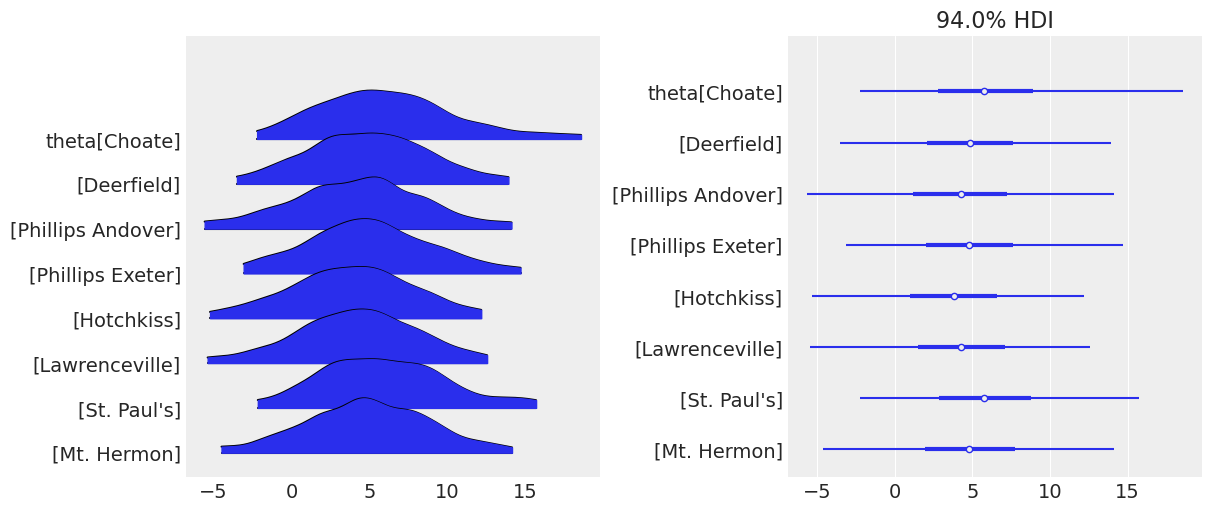

In [7]:
#| label: fig-ex-comb
#| fig-cap: "Posterior estimates for theta, 8 schools example, chains combined"

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

az.plot_forest(non_centered_data,kind='ridgeplot',ridgeplot_overlap=1,
               var_names=['theta'],combined=True,ax=ax1)
az.plot_forest(non_centered_data,kind='forestplot',
               var_names=['theta'],combined=True,ax = ax2)
plt.show()

## Analysis of usage advise

 + The function's description is vague and not informative:  
 
$\quad$  *"Forest plot to compare HDI intervals from a number of distributions. Generates a forest plot of $100(hdi\_prob)$  HDI intervals from a trace or list of traces."*

 + The function not only generate forest plots but ridge plots as well,
 
 + There is no guarantee that the calculated intervals are HDI. For example, the quantiles won't be HDI if the posterior distribution is multi-modal.
 
 + `quartile` option is limited to a boolean option, but `mcmc_intervals()` from [bayesplot](https://mc-stan.org/bayesplot/reference/MCMC-intervals.html) uses two arguments, `prob = 0.5` that controls the inner intervals, and `prob_outer = 0.9` equivalent to ArviZ's `hdi_prob` option.
 
 + The `rope`'s utility is not clear to me. 
 
 + `r_hat` and `ess` options add extra plots that do not seem pleasing. [bayesplot](https://mc-stan.org/bayesplot/reference/MCMC-intervals.html) changes the interval's color depending on the obtained `rhat`.
 
 + `ridgeplot_quantiles` displays dots for the specified quantiles, but this confuses the visualization as the densities overlap. 
 
 + The documentation should specify that the central point is the posterior mean, the thick line represents the quartiles (option set by default), and the thin line is the specified interval.
 
 + `combine_dims` documentation has a typo. The expression *"See the this section for usage examples."* has an extra **"the."**
 
 + `coords` argument does not have a clear documentation. Adding the *"See this section for usage examples."* expression cleared things up.
 
 + `combine_dims` argument is confusing. How is the mixing done? Does that make sense? Visually I see its utility (at least in Multi-level models), but in theory, mixing dimensions is not a straightforward thing to me.
 
## Relevant Issues

 + Visual improvements for forest plot No 2083: the legends and pictures are listed differently. 
 
 + Request for Horizontal forest plot No 1610: this could be useful when presenting multiple parameters' posterior.
 